### ورودی گرفتن دیتاست 

In [14]:
import pandas as pd
import numpy as np

file_path = 'spiral-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

print(data_frame.head())

data = data_frame[['x', 'y']].values

       x     y
0  31.95  7.95
1  31.15  7.30
2  30.45  6.65
3  29.70  6.00
4  28.90  5.55


### single link تعریف تابع محاسبه ی فاصله

In [15]:
def single_link(C, C_prime):
    return np.min([np.linalg.norm(x - y) for x in C for y in C_prime])

### تعریف تابع خوشه بندی سلسله مراتبی

In [16]:

def hierarchical_clustering(data, distance_func):
    clusters = [[point] for point in data]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((i, j, min_distance))
        new_cluster = clusters[i] + clusters[j]
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

### اجرای مراحل خوشه بندی ، نمایش فرم خام دندوگرام خوشه بندی سلسله مراتبی

خوشه باقی میماند n-1 ر این بخش شما ابتدا خوشه بندی را به صورت خام مرحله به مرحله مشاهده میکنید. همانطور که انتظار میرفت در هر مرحله دو خوشه با یکدیگر ادغام میشوند و در پایان هر مرحله 

In [17]:
merge_steps_single = hierarchical_clustering(data, single_link)

[[array([31.95,  7.95])], [array([31.15,  7.3 ])], [array([30.45,  6.65])], [array([29.7,  6. ])], [array([28.9 ,  5.55])], [array([28.05,  5.  ])], [array([27.2 ,  4.55])], [array([26.35,  4.15])], [array([25.4 ,  3.85])], [array([24.6,  3.6])], [array([23.6,  3.3])], [array([22.75,  3.15])], [array([21.85,  3.05])], [array([20.9,  3. ])], [array([20. ,  2.9])], [array([19.1,  3. ])], [array([18.2,  3.2])], [array([17.3 ,  3.25])], [array([16.55,  3.5 ])], [array([15.7,  3.7])], [array([14.85,  4.1 ])], [array([14.15,  4.4 ])], [array([13.4 ,  4.75])], [array([12.7,  5.2])], [array([12.05,  5.65])], [array([11.45,  6.15])], [array([10.9 ,  6.65])], [array([10.3 ,  7.25])], [array([9.7 , 7.85])], [array([9.35, 8.35])], [array([8.9 , 9.05])], [array([8.55, 9.65])], [array([ 8.15, 10.35])], [array([ 7.95, 10.95])], [array([ 7.75, 11.7 ])], [array([ 7.55, 12.35])], [array([ 7.45, 13.  ])], [array([ 7.35, 13.75])], [array([ 7.3 , 14.35])], [array([ 7.35, 14.95])], [array([ 7.35, 15.75])], 

###  تعریف تابع نمایش واضح مراحل خوشه بندی و نمایش آن 

In [18]:

def print_merge_steps(merge_steps, method):
    print(f"\n{method} Linkage Merging Steps and Distances:")
    for step, (i, j, distance) in enumerate(merge_steps, 1):
        print(f"Step {step}: Merging clusters {i} and {j} with distance {distance}")


print_merge_steps(merge_steps_single, 'Single')


Single Linkage Merging Steps and Distances:
Step 1: Merging clusters 100 and 101 with distance 0.07071067811865325
Step 2: Merging clusters 308 and 309 with distance 0.09999999999999964
Step 3: Merging clusters 101 and 102 with distance 0.1118033988749879
Step 4: Merging clusters 97 and 98 with distance 0.11180339887498948
Step 5: Merging clusters 99 and 306 with distance 0.11180339887498948
Step 6: Merging clusters 297 and 298 with distance 0.141421356237309
Step 7: Merging clusters 97 and 301 with distance 0.14142135623731025
Step 8: Merging clusters 97 and 302 with distance 0.14142135623731025
Step 9: Merging clusters 302 and 303 with distance 0.14142135623731025
Step 10: Merging clusters 295 and 301 with distance 0.15000000000000036
Step 11: Merging clusters 95 and 96 with distance 0.15811388300841672
Step 12: Merging clusters 93 and 94 with distance 0.15811388300841783
Step 13: Merging clusters 287 and 288 with distance 0.15811388300841783
Step 14: Merging clusters 288 and 295 wi

### جهت نمایش زیبا تر و شهودی تر نمایه دندوگرام خوشه بندی سلسله مراتبی از توابع خارجی صرفا در این سکشن استفاده کردیم!

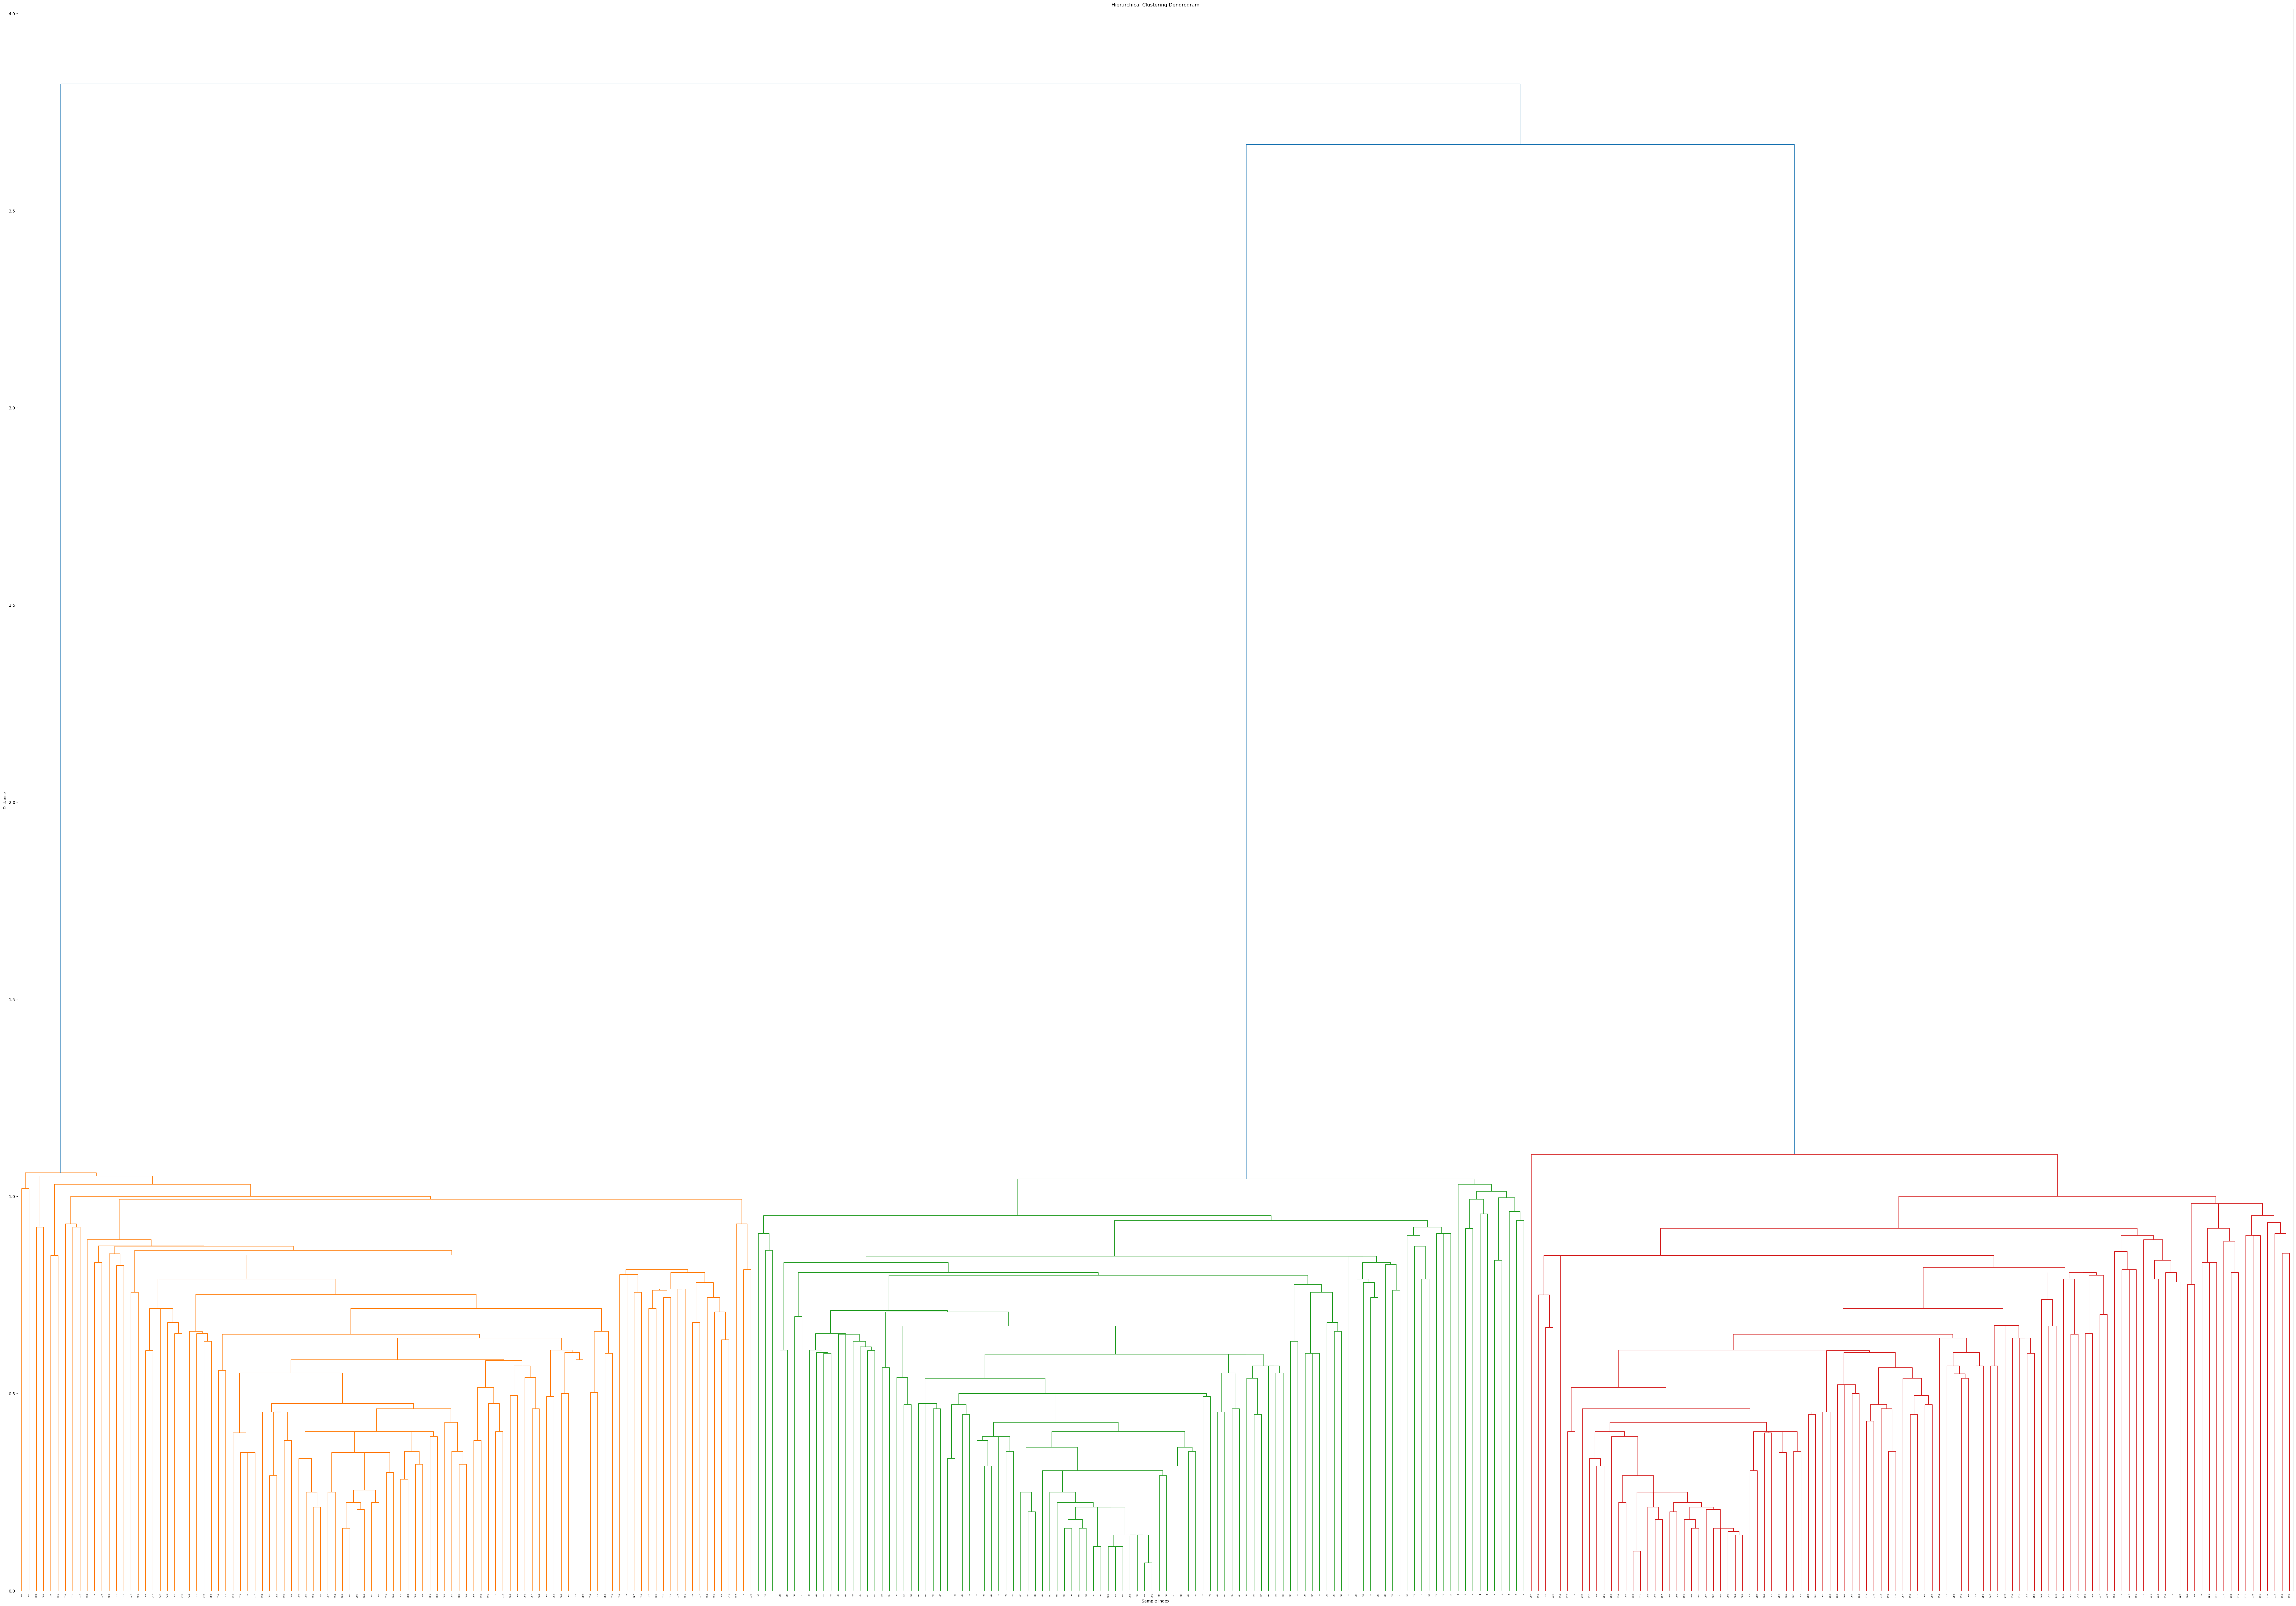

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform



linkage_data = linkage(data, method='single', metric='euclidean')


plt.figure(figsize=(100, 70))
dendrogram(linkage_data)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### σ (sigmia) محاسبه ی مقدار
در این مرحله مقدار سیگما که طبق شرح پروژه گفته شده بود برابر مربع متوسط
فاصله در مجموعه داده باشد نسبت به دیتاست داده شده پیدا میکنیم و برابر سیگما قرار میدهیم.

In [20]:
def calculate_sigma(data):
    n = len(data)
    total_distance = 0
    for i in range(n):
        for j in range(i + 1, n):
            total_distance += np.linalg.norm(data[i] - data[j]) ** 2
    sigma = total_distance / (n * (n - 1) / 2)
    return sigma

sigma = calculate_sigma(data)
print(f"Sigma: {sigma}")


Sigma: 200.89550117486976


### تعریف تابع هزینه ی داسگوپتا
+ جای گذاری مقدار محاسبه شده ی سیگما 

In [21]:
def similarity(x, y, sigma=200):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def dasgupta_cost(data, merge_steps, sigma=200):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=200)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost


### محاسبه ی هزینه ی درخت دو دویی دندوگرام ساخته شده با روش سینگل لینک با تابع داسگوپتایی که تعریف کردیم
در این بخش ما برای رفع ارور های از نوع تایپ ارور که به آن بر میخوردیم مجبور به ایجاد تغییرات جزئی در تابع خوشه بندی سلسله مراتبی مان شدیم تا به جای خروجی هایی از جنس مختصات نقاط ، شماره (عنوان ، اندیس) نقاط را به ما برگرداند لذا در خروجی کد زیر دوباره شاهد مراحل خوشه بندی به فرم خام این بار با اندیس نقاط و در پایان مراحل شاهد مقدار هزینه ی محاسبه شده توسط تابع هزینه ی داسگوپتایمان هستیم.

In [22]:
import numpy as np
import pandas as pd

def similarity(x, y, sigma=200):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def single_link(C, C_prime):
    return np.min([np.linalg.norm(x - y) for x in C for y in C_prime])

def hierarchical_clustering(data, distance_func):
    clusters = [{i} for i in range(len(data))]
    merge_steps = []
    while len(clusters) > 1:
        min_distance = float('inf')
        clusters_to_merge = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = distance_func([data[list(clusters[i])[0]]], [data[list(clusters[j])[0]]])
                if distance < min_distance:
                    min_distance = distance
                    clusters_to_merge = (i, j)
        i, j = clusters_to_merge
        merge_steps.append((clusters[i], clusters[j], min_distance))
        new_cluster = clusters[i].union(clusters[j])
        clusters = [clusters[k] for k in range(len(clusters)) if k not in clusters_to_merge] + [new_cluster]
        print(f"{clusters}\n")
    return merge_steps

def dasgupta_cost(data, merge_steps, sigma=200):
    n = len(data)
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            W[i, j] = similarity(data[i], data[j], sigma=200)
    
    cost = 0
    clusters = [{i} for i in range(n)]
    for step in merge_steps:
        c1, c2, dist = step
        c1_indices = c1
        c2_indices = c2
        new_cluster = c1_indices.union(c2_indices)
        for i in c1_indices:
            for j in c2_indices:
                cost += dist * W[i, j] * len(new_cluster)
        clusters = [c for c in clusters if c != c1_indices and c != c2_indices] + [new_cluster]
    return cost

file_path = 'spiral-data.txt'  
data_frame = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])

data = data_frame[['x', 'y']].values

merge_steps_single = hierarchical_clustering(data, single_link)

cost = dasgupta_cost(data, merge_steps_single)
print("Dasgupta Cost:", cost)


[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40}, {41}, {42}, {43}, {44}, {45}, {46}, {47}, {48}, {49}, {50}, {51}, {52}, {53}, {54}, {55}, {56}, {57}, {58}, {59}, {60}, {61}, {62}, {63}, {64}, {65}, {66}, {67}, {68}, {69}, {70}, {71}, {72}, {73}, {74}, {75}, {76}, {77}, {78}, {79}, {80}, {81}, {82}, {83}, {84}, {85}, {86}, {87}, {88}, {89}, {90}, {91}, {92}, {93}, {94}, {95}, {96}, {97}, {98}, {99}, {102}, {103}, {104}, {105}, {106}, {107}, {108}, {109}, {110}, {111}, {112}, {113}, {114}, {115}, {116}, {117}, {118}, {119}, {120}, {121}, {122}, {123}, {124}, {125}, {126}, {127}, {128}, {129}, {130}, {131}, {132}, {133}, {134}, {135}, {136}, {137}, {138}, {139}, {140}, {141}, {142}, {143}, {144}, {145}, {146}, {147}, {148}, {149}, {150}, {151}, {152}, {153}, {154}, {155}, {156}, {157}, {158}, {159}, {16